# Atomic array with N = 2

Analytical investigations

First case is $\bar{r} = r \cdot \hat{e}_x$ and $\bar{d} = \hat{e}_x$. 

For this, the decay rates can be determined analytically (following Asenjo-Garcia et al. as in numerical calculations): $\Gamma_{\pm} = 1 \mp \frac{e}{r^3} \cdot (r \cdot cos(r) + sin(r))$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
lower_bound = 1/100000
upper_bound = 1/1000
r = np.linspace(lower_bound, upper_bound, N)
d_lambda0 = r*2*np.pi

gamma_p = lambda r: -1 - 3/r**3 * (r*np.cos(r) + np.sin(r))
gamma_m = lambda r: -1 + 3/r**3 * (r*np.cos(r) + np.sin(r))

y_p = gamma_p(d_lambda0)
y_m = gamma_m(d_lambda0)


## Numerical comparison:

[-3.34164968e-07 -5.32846966e-08 -5.32846966e-08  1.69353711e-08
  1.69353709e-08  8.71554389e-08  1.69353709e-08  1.69353710e-08
  1.69353715e-08 -1.81746631e-08  5.20454050e-08  1.69353709e-08
  1.69353710e-08  1.69353710e-08 -1.81746632e-08 -1.81746631e-08
  1.69353710e-08  3.44903880e-08 -6.19646071e-10 -1.81746630e-08
 -6.19646001e-10 -6.19646237e-10 -9.39715486e-09 -9.39715455e-09
 -9.39715467e-09 -6.19646154e-10 -6.19646168e-10 -6.19646043e-10
  8.15786237e-09  8.15786262e-09  8.15786243e-09  8.15786259e-09
 -6.19646057e-10  8.15786250e-09  8.15786254e-09  8.15786244e-09
  1.25466168e-08  1.25466170e-08  8.15786236e-09  8.15786262e-09
  8.15786243e-09  1.25466167e-08  8.15786244e-09  1.69353710e-08
  8.15786240e-09  1.69353710e-08  1.25466168e-08  1.69353712e-08
  8.15786282e-09  2.13241253e-08  1.69353708e-08  1.69353711e-08
  1.69353710e-08  1.69353713e-08  1.47409940e-08  1.69353710e-08
  2.13241252e-08  1.69353708e-08  2.13241252e-08  1.91297482e-08
  1.91297484e-08  1.91297

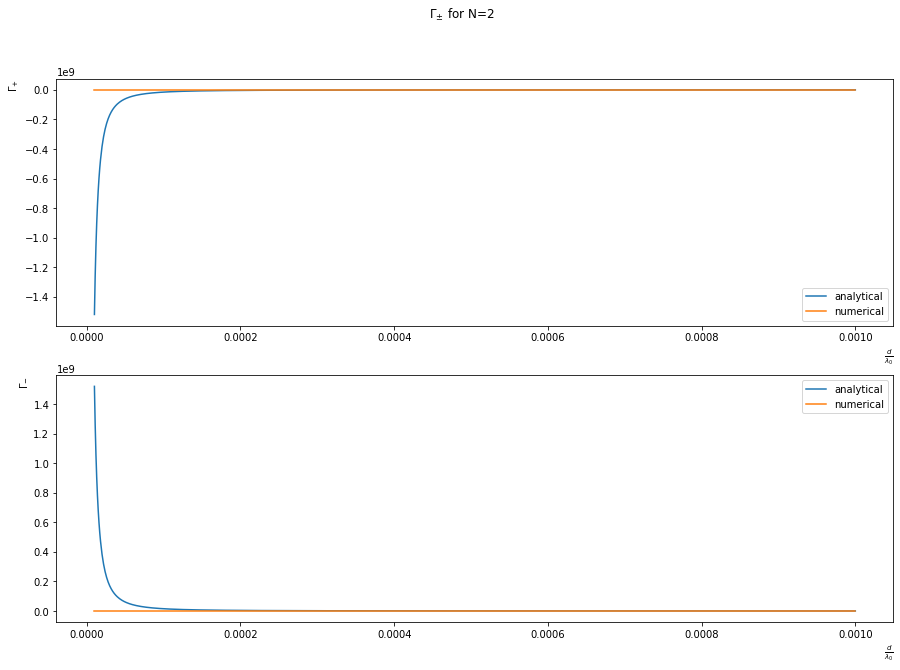

In [32]:
import Lattice
import Hamiltonian
from GreensTensor import fill_G
from utils import *

lattice = Lattice.Lattice()
block = Hamiltonian.Hamiltonian()

N = 2
def calc_rates(d):
    lattice.linlat(N, d, ex, ex)        #initialize linear lattice
    pos, rij, pola = lattice.getPositions(), lattice.getDisplacements(), lattice.getPolarizations()

    #Linear parallel case:
    G = fill_G(N, rij)

    block.block(N, G, pola)       #initialize block hamiltonian with N dipoles and calculated G (vacuum) and ex pola direction.
    block.eigenDecomposition()

    #decay rates:
    decay_rates = block.getDecayRates()
    return decay_rates

gamma_1 = []
gamma_2 = []
for rs in d_lambda0:
    g = calc_rates(rs)
    gamma_1.append(g[0])
    gamma_2.append(g[1])

gamma_1 = np.array(gamma_1)
gamma_2 = np.array(gamma_2)
print(gamma_1)
fig, ax = plt.subplots(nrows=2)
fig.suptitle(r"$\Gamma_{\pm}$ for N=2")
fig.set_size_inches(15, 10)

ax[0].plot(r, y_p, label = "analytical")
ax[1].plot(r, y_m, label = "analytical")

ax[0].set_xlabel(r"$\frac{d}{\lambda_0}$", loc="right")
ax[1].set_xlabel(r"$\frac{d}{\lambda_0}$", loc="right")

ax[0].set_ylabel(r"$\Gamma_{+}$", loc="top")
ax[1].set_ylabel(r"$\Gamma_{-}$", loc="top")

ax[0].plot(r, gamma_1, label="numerical")
ax[1].plot(r, gamma_2, label="numerical")

ax[0].legend()
ax[1].legend()